There are 17 pads with a total of 57147 elementary operations
PAD:Group 15_session 1

SCORES
User proportion per paragraph score:0.298762620001
Proportion score:0.929281940694
Synchronous score:0.6460906670088825
Alternating score:0.23636363636363636
Break score day:6.828661276479029e-06
Break score short:9.560125787070641e-06
Overall write type score:0.12366114897760468
Overall paste type score:0.09444985394352483
Overall delete type score:0.035053554040895815
Overall edit type score:0.7468354430379747
User write score:0.874277149777
User paste score:0.822409085905
User delete score:0.965503309389
User edit score:0.992134690695
        Type Counts   Types
Types                      
write         127.0   write
edit          767.0    edit
delete         36.0  delete
paste          97.0   paste
PAD:Group 9_session 1

SCORES
User proportion per paragraph score:0.125261103714
Proportion score:0.892323341133
Synchronous score:0.9472696435522493
Alternating score:0.13636363636363635
Break s

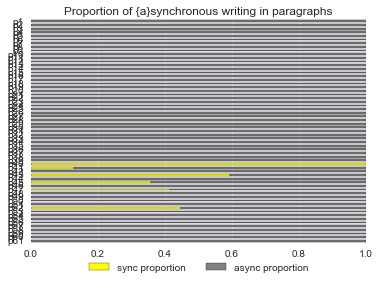

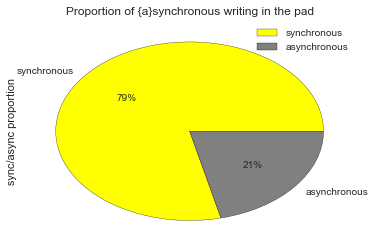

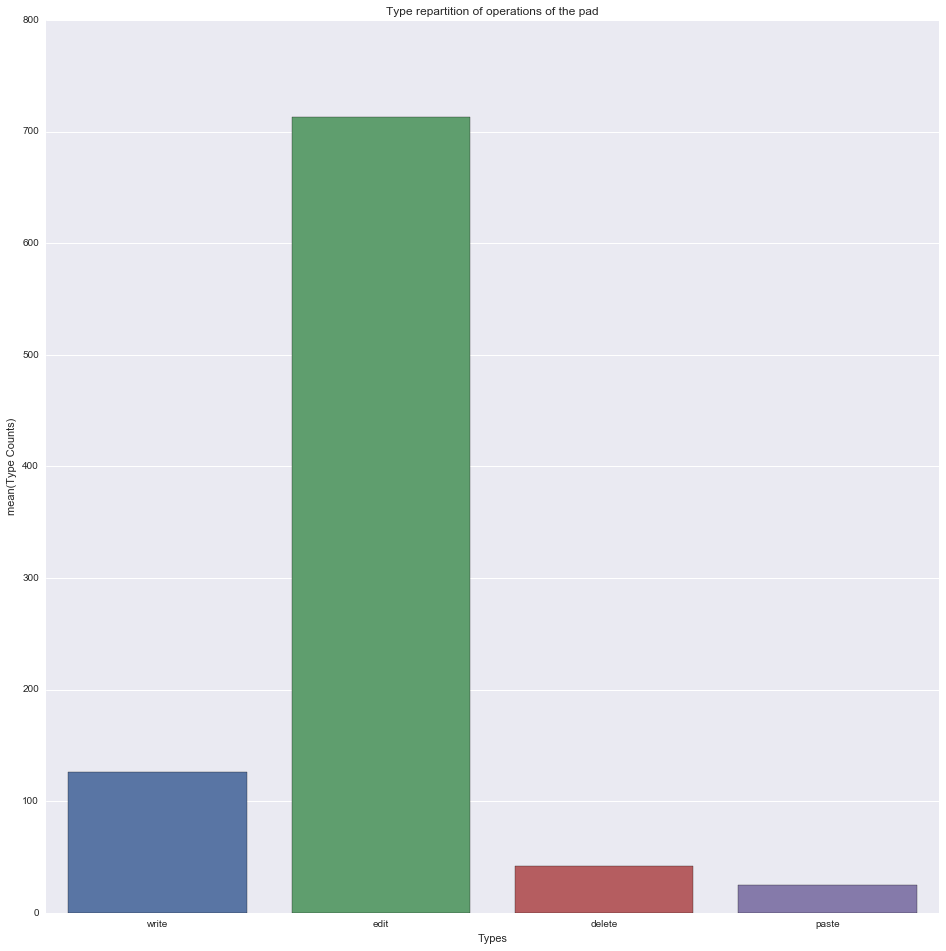

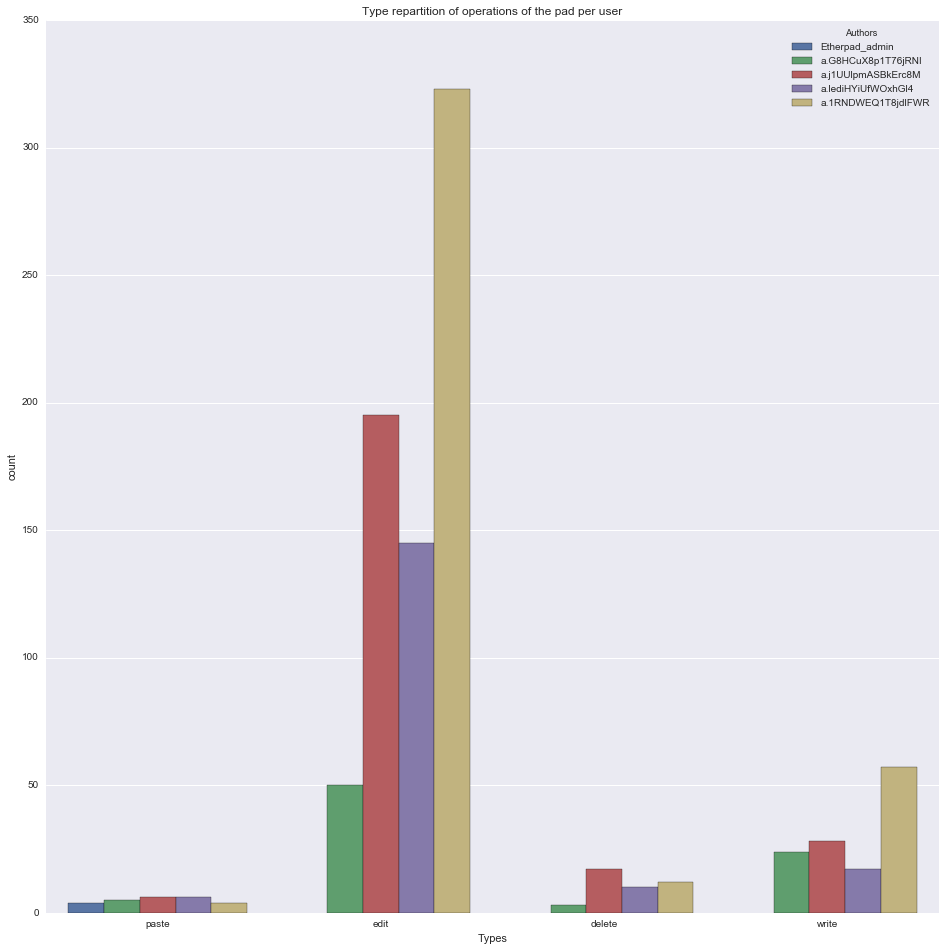

In [155]:
import config
from analytics import operation_builder
from analytics.parser import *
from analytics.visualization import *
import os

list_of_elem_ops_per_pad = dict()
elemOpsCounter = 0
root_of_dbs = "belgian_experiment/"
for (dirpath, dirnames, filenames) in os.walk(root_of_dbs):
    for filename in filenames:
        if ".db" in filename:
            path_to_db = os.path.join(dirpath, filename)
            list_of_elem_ops_per_main, _ = get_elem_ops_per_pad_from_db(path_to_db=path_to_db, editor='etherpadSQLite3')
            pad_name = path_to_db[len(root_of_dbs):path_to_db.find("data") - 1]
            assert len(list_of_elem_ops_per_main.keys()) == 1
            list_of_elem_ops_per_pad[pad_name] = list_of_elem_ops_per_main['main']

pads, _, elem_ops_treated = operation_builder.build_operations_from_elem_ops(list_of_elem_ops_per_pad,
                                                                             config.maximum_time_between_elem_ops)

for pad_name in pads:
    elemOpsCounter += len(elem_ops_treated[pad_name])
    pad = pads[pad_name]
    # create the paragraphs
    pad.create_paragraphs_from_ops(elem_ops_treated[pad_name])
    # classify the operations of the pad
    pad.classify_operations(length_edit=config.length_edit, length_delete=config.length_delete)
    # find the context of the operation of the pad
    pad.build_operation_context(config.delay_sync, config.time_to_reset_day, config.time_to_reset_break)

print("There are %s pads with a total of %s elementary operations" % (str(len(pads)), str(elemOpsCounter)))

user_participation_paragraph_score_list = []
prop_score_list = []
sync_score_list = []
alternating_score_list = []
break_score_day_list = []
break_score_short_list = []
type_overall_score_write_list = []
type_overall_score_delete_list = []
type_overall_score_edit_list = []
type_overall_score_paste_list = []
user_type_score_delete_list = []
user_type_score_edit_list = []
user_type_score_write_list = []
user_type_score_paste_list = []

pad_names = list(pads)
for pad_name in pad_names:
    pad = pads[pad_name]
    user_participation_paragraph_score = pad.user_participation_paragraph_score()
    user_participation_paragraph_score_list.append(user_participation_paragraph_score)
    prop_score = pad.prop_score()
    prop_score_list.append(prop_score)
    sync_score = pad.sync_score()[0]
    sync_score_list.append(sync_score)
    alternating_score = pad.alternating_score()
    alternating_score_list.append(alternating_score)
    break_score_day = pad.break_score('day')
    break_score_day_list.append(break_score_day)
    break_score_short = pad.break_score('short')
    break_score_short_list.append(break_score_short)
    type_overall_score_write = pad.type_overall_score('write')
    type_overall_score_write_list.append(type_overall_score_write)
    type_overall_score_paste = pad.type_overall_score('paste')
    type_overall_score_paste_list.append(type_overall_score_paste)
    type_overall_score_delete = pad.type_overall_score('delete')
    type_overall_score_delete_list.append(type_overall_score_delete)
    type_overall_score_edit = pad.type_overall_score('edit')
    type_overall_score_edit_list.append(type_overall_score_edit)
    user_type_score_write = pad.user_type_score('write')
    user_type_score_write_list.append(user_type_score_write)
    user_type_score_paste = pad.user_type_score('paste')
    user_type_score_paste_list.append(user_type_score_paste)
    user_type_score_delete = pad.user_type_score('delete')
    user_type_score_delete_list.append(user_type_score_delete)
    user_type_score_edit = pad.user_type_score('edit')
    user_type_score_edit_list.append(user_type_score_edit)
    
               #+ "TEXT:\n" + pad.get_text() + "\n" \
               #+ '\nCOLORED TEXT BY AUTHOR\n' + pad.display_text_colored_by_authors() + "\n" \
               #+ '\nCOLORED TEXT BY OPS\n' + pad.display_text_colored_by_ops() + "\n" \
    to_print = "PAD:" + pad_name + "\n" \
               + '\nSCORES' \
               + '\nUser proportion per paragraph score:' + str(user_participation_paragraph_score) \
               + '\nProportion score:' + str(prop_score) \
               + '\nSynchronous score:' + str(sync_score) \
               + '\nAlternating score:' + str(alternating_score) \
               + '\nBreak score day:' + str(break_score_day) \
               + '\nBreak score short:' + str(break_score_short) \
               + '\nOverall write type score:' + str(type_overall_score_write) \
               + '\nOverall paste type score:' + str(type_overall_score_paste) \
               + '\nOverall delete type score:' + str(type_overall_score_delete) \
               + '\nOverall edit type score:' + str(type_overall_score_edit) \
               + '\nUser write score:' + str(user_type_score_write) \
               + '\nUser paste score:' + str(user_type_score_paste) \
               + '\nUser delete score:' + str(user_type_score_delete) \
               + '\nUser edit score:' + str(user_type_score_edit)
    print(to_print)
    with open("testing stuff/texts/" + pad_name + ".txt", "w+", encoding='utf-8') as f:
        f.write(to_print)

    display_user_participation(pad, 'testing_stuff/figures')
    # plot the participation proportion per user per paragraphs
    display_user_participation_paragraphs(pad, 'testing_stuff/figures')
    display_user_participation_paragraphs_with_del(pad, 'testing_stuff/figures')

    # plot the proportion of synchronous writing per paragraphs
    display_proportion_sync_in_paragraphs(pad, 'testing_stuff/figures')
    display_proportion_sync_in_pad(pad, 'testing_stuff/figures')

    # plot the overall type counts
    display_overall_op_type(pad, 'testing_stuff/figures')

    # plot the counts of type per users
    display_types_per_user(pad, 'testing_stuff/figures')


In [166]:
df = pd.DataFrame(list(pads),columns = ['pad_name'])
df['User proportion per paragraph score'] = user_participation_paragraph_score_list
df['Proportion score'] = prop_score_list
df['Synchronous score'] = sync_score_list
df['Alternating score'] = alternating_score_list
df['Break score day'] = break_score_day_list
df['Break score short'] = break_score_short_list
df['User write score'] = user_type_score_write_list
df['User paste score'] = user_type_score_paste_list
df['User delete score'] = user_type_score_delete_list
df['User edit score'] = user_type_score_edit_list
df['Overall write type score']= type_overall_score_write_list
df['Overall paste type score']= type_overall_score_paste_list
df['Overall delete type score']= type_overall_score_delete_list
df['Overall edit type score']= type_overall_score_edit_list

In [167]:
df

,pad_name,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
0,Group 15_session 1,0.298763,0.929282,0.646091,0.236364,0.000007,0.000010,0.874277,0.822409,0.965503,0.992135,0.123661,0.094450,0.035054,0.746835
1,Group 9_session 1,0.125261,0.892323,0.947270,0.136364,0.000004,0.000003,0.827181,0.877337,0.908927,0.995644,0.096386,0.071142,0.057372,0.775100
2,Group 10_session 1,0.242151,0.925045,0.891879,0.223881,0.000007,0.000007,0.530678,0.880169,0.898776,0.990443,0.044831,0.051688,0.025316,0.878165
3,Group 3_session 1,0.185996,0.956413,0.884363,0.234043,0.000007,0.000008,0.908025,0.928234,0.966453,0.988724,0.157383,0.036251,0.057471,0.748895
4,Group 5_session 1,0.017547,0.780257,0.610017,0.152542,0.000005,0.000007,0.986510,0.846927,0.955123,0.995538,0.208688,0.024702,0.035775,0.730835
5,Group 2_session 1,0.028486,0.958771,0.760473,0.194444,0.000007,0.000011,0.908324,0.960783,0.990552,0.993843,0.145315,0.084130,0.036329,0.734226
6,Group 14_session 1,0.188572,0.960643,0.789462,0.165049,0.000007,0.000005,0.899329,0.719670,0.985142,0.988528,0.119534,0.023324,0.041545,0.815598
7,Group 1_session 1,0.230593,0.713718,0.851716,0.187500,0.000009,0.000008,0.793387,0.652019,0.749192,0.986561,0.147907,0.030698,0.067907,0.753488
8,Group 13_session 1,0.126269,0.880039,0.899606,0.184615,0.000005,0.000007,0.869486,0.926023,0.968768,0.994405,0.112548,0.069962,0.088973,0.728517
9,Group 17_session 1,0.288649,0.879285,0.841728,0.061224,0.000008,0.000010,0.865067,0.897049,0.950400,0.987521,0.132505,0.033126,0.035197,0.799172


In [158]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df = df.set_index('pad_name')

In [114]:
df.describe()

,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.173464,0.892876,0.811710,0.175394,0.000007,0.000007,0.963315,0.821366,0.925438,0.991884,0.259791,0.084655,0.082398,0.573156
std,0.091051,0.068762,0.095128,0.054413,0.000001,0.000002,0.036642,0.126155,0.060996,0.009181,0.046548,0.042803,0.029744,0.055200
min,0.015136,0.707985,0.584995,0.061224,0.000004,0.000003,0.864673,0.536175,0.761347,0.960456,0.188552,0.042654,0.043243,0.511628
25%,0.130608,0.873666,0.770023,0.145833,0.000007,0.000005,0.955425,0.757536,0.903177,0.992134,0.227723,0.050360,0.068720,0.522013
50%,0.153228,0.909048,0.825517,0.163636,0.000007,0.000007,0.974930,0.853131,0.943568,0.995501,0.257194,0.080672,0.074074,0.559242
75%,0.260707,0.947662,0.888037,0.233333,0.000007,0.000008,0.985940,0.914544,0.971266,0.996308,0.296703,0.105066,0.092437,0.615108
max,0.326616,0.959035,0.946530,0.255319,0.000009,0.000011,0.997244,0.990687,0.987466,0.997950,0.364341,0.199005,0.165103,0.671717


# Correlations

In [115]:
df.corr()

,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,User edit score,Overall write type score,Overall paste type score,Overall delete type score,Overall edit type score
User proportion per paragraph score,1.000000,0.198027,0.240750,0.159933,0.308543,0.045590,-0.258789,-0.037400,0.061405,-0.108679,-0.184714,0.054455,-0.042573,0.136477
Proportion score,0.198027,1.000000,0.129249,0.483724,-0.340614,-0.049105,0.440881,0.460565,0.495494,0.089134,-0.352194,0.207758,-0.305843,0.300694
Synchronous score,0.240750,0.129249,1.000000,-0.198178,-0.205659,-0.327595,-0.251919,-0.110411,-0.457460,-0.421579,-0.349257,-0.084743,0.438624,0.123878
Alternating score,0.159933,0.483724,-0.198178,1.000000,-0.069237,-0.065225,0.254787,0.148578,0.343979,0.415325,0.100620,0.245687,-0.193096,-0.171311
Break score day,0.308543,-0.340614,-0.205659,-0.069237,1.000000,0.278563,-0.297784,0.005535,0.051265,0.205988,0.236668,-0.448169,-0.164474,0.236570
Break score short,0.045590,-0.049105,-0.327595,-0.065225,0.278563,1.000000,-0.053297,0.082657,0.268508,0.271166,-0.034911,0.117536,-0.271346,0.084512
User write score,-0.258789,0.440881,-0.251919,0.254787,-0.297784,-0.053297,1.000000,0.408607,0.706881,0.624798,0.451716,-0.033715,-0.147799,-0.275131
User paste score,-0.037400,0.460565,-0.110411,0.148578,0.005535,0.082657,0.408607,1.000000,0.456965,0.089861,0.183925,-0.255418,-0.007775,0.047148
User delete score,0.061405,0.495494,-0.457460,0.343979,0.051265,0.268508,0.706881,0.456965,1.000000,0.633203,0.285562,-0.006897,-0.312079,-0.067295
User edit score,-0.108679,0.089134,-0.421579,0.415325,0.205988,0.271166,0.624798,0.089861,0.633203,1.000000,0.392665,0.054161,-0.060132,-0.340714


# Kmeans and PCA

/home/pace/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Difference in cluster centers features
[('User proportion per paragraph score', -0.0040513784148237808),
 ('Proportion score', -0.063906218952697991),
 ('Synchronous score', 0.089215834009050421),
 ('Alternating score', -0.029701968844223575),
 ('Break score day', -3.3906119174038747e-07),
 ('Break score short', -1.1039128555621447e-06),
 ('User write score', -0.045436069707918247),
 ('User paste score', -0.22595414640829325),
 ('User delete score', -0.096317320656487015),
 ('User edit score', -0.00688927875502654),
 ('Overall write type score', -0.03452181393693679),
 ('Overall paste type score', 0.02146005788224413),
 ('Overall delete type score', 0.0077024618181414234),
 ('Overall edit type score', 0.0053592942365512375)]

Difference between the mean features of each cluster
User proportion per paragraph score   -4.051378e-03
Proportion score                      -6.390622e-02
Synchronous score                      8.921583e-02
Alternating score                     -2.970197e-02
Bre

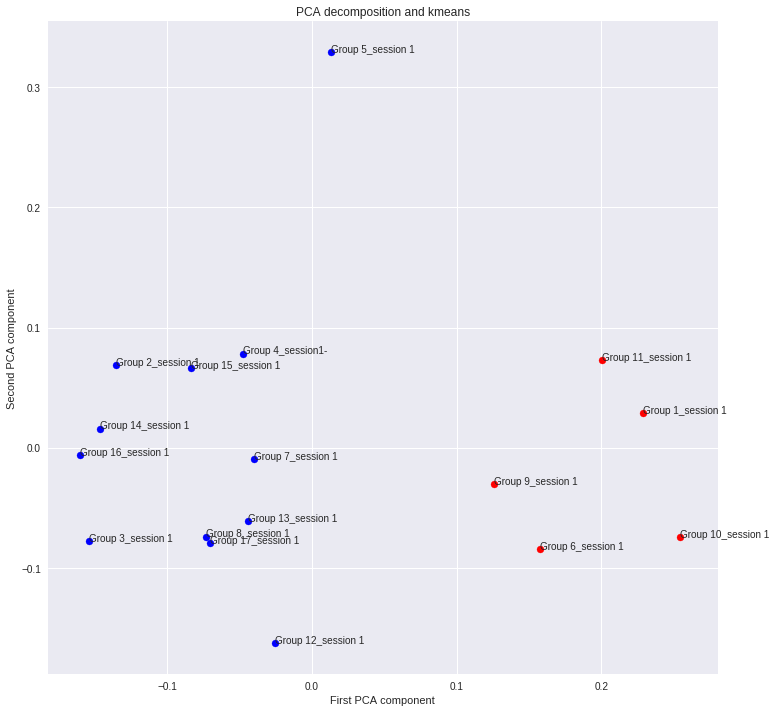

In [116]:
kmeans = KMeans(n_clusters=2)
assignments = kmeans.fit_predict(df)

pca = PCA(n_components=2,random_state=1)
pca.fit(df)

df_0 = df[assignments == 0]
X_0 = pca.transform(df_0)
pad_names_0 = np.array(pad_names)[assignments == 0]
df_1 = df[assignments == 1]
X_1 = pca.transform(df_1)
pad_names_1 = np.array(pad_names)[assignments == 1]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X_0.T[0],X_0.T[1],color='red')
for i, txt in enumerate(pad_names_0):
    ax.annotate(txt, (X_0.T[0][i],X_0.T[1][i]))
ax.scatter(X_1.T[0],X_1.T[1],color='blue')
for i, txt in enumerate(pad_names_1):
    ax.annotate(txt, (X_1.T[0][i],X_1.T[1][i]))
ax.set_title('PCA decomposition and kmeans')
ax.set_xlabel('First PCA component')
ax.set_ylabel('Second PCA component')
fig.show()

print('Difference in cluster centers features')
pprint(list(zip(df.columns,kmeans.cluster_centers_[0]-kmeans.cluster_centers_[1])))

print("\nDifference between the mean features of each cluster")
pprint((df_0.describe()-df_1.describe()).loc['mean'])

In [117]:
df_0['User paste score']

pad_name
Group 6_session 1     0.757536
Group 9_session 1     0.718340
Group 10_session 1    0.536175
Group 11_session 1    0.634212
Group 1_session 1     0.663084
Name: User paste score, dtype: float64

In [118]:
df_1['User paste score']

pad_name
Group 3_session 1     0.965313
Group 17_session 1    0.912466
Group 14_session 1    0.938238
Group 13_session 1    0.918107
Group 4_session1-     0.830085
Group 12_session 1    0.857777
Group 16_session 1    0.990687
Group 15_session 1    0.848729
Group 2_session 1     0.914544
Group 8_session 1     0.853131
Group 5_session 1     0.758419
Group 7_session 1     0.866387
Name: User paste score, dtype: float64

## Study of the outlier

In [119]:
df_wo_outlier = df[df.index != 'Group 5_session 1']
df.loc['Group 5_session 1']- df_wo_outlier.describe().loc['mean']

User proportion per paragraph score   -1.682232e-01
Proportion score                      -1.276839e-01
Synchronous score                     -2.408851e-01
Alternating score                     -2.427981e-02
Break score day                       -2.393873e-07
Break score short                     -2.374290e-07
User write score                       3.604948e-02
User paste score                      -6.688170e-02
User delete score                      2.907582e-02
User edit score                        3.676241e-03
Overall write type score               1.110844e-01
Overall paste type score              -4.052760e-02
Overall delete type score             -5.183590e-03
Overall edit type score               -6.537320e-02
dtype: float64

# Pretest Result Analysis

In [160]:
df_pretest = pd.read_excel(root_of_dbs+'Data Ghent 2017_pretest.xlsx', sheet_name='Data')

In [161]:
df_pretest

,NAME,GROUP,PREF_ADJU,[transm_1],[transact_1],[transact_2],[transact_3],[transm_2],[transact_4],[transact_5],...,[destr_win-l_3],[destr_rejec_3],plann_rec,plann_2_rec,plann_4_rec,revis_6_rec,revis_9_rec,const_confi_3_rec,WritingStylePlanning,WritingStyleRevision
0,Laurien Ketsman,8,3,2,4,5,3,3,2,4,...,3,1,4,4,4,3,5,5,2.57,4.00
1,Elise Verhelst,12,3,3,3,4,4,3,3,4,...,2,2,3,3,5,4,5,5,3.57,4.00
2,Jana Cloet,12,3,3,4,5,4,2,4,4,...,3,2,4,5,4,3,5,5,3.86,5.00
3,Laura Van Den Abeele,3,3,3,2,4,3,4,5,4,...,3,3,3,5,3,3,5,4,4.86,3.00
4,Maxime Moens,13,4,3,4,5,3,3,5,2,...,2,1,5,4,1,4,4,5,3.86,4.67
5,Freya Weverbergh,17,4,3,5,5,4,4,3,4,...,3,1,4,2,4,2,5,5,2.71,5.00
6,Sandra Van Den Heuvel,7,3,2,3,5,3,2,2,5,...,2,2,4,1,3,4,5,5,1.71,4.67
7,Eline Vanderdonck,6,3,5,3,5,2,3,4,3,...,2,1,3,4,5,1,5,5,2.57,4.67
8,Tineke Daneels,9,2,2,1,5,1,4,4,2,...,2,2,5,5,2,1,4,5,3.14,2.67
9,Margot De Bast,17,4,2,4,5,4,3,4,4,...,3,2,4,4,4,3,5,5,2.71,4.00


In [162]:
df_pad_pretest = pd.DataFrame(df_pretest['GROUP'].drop_duplicates()).sort_values(by='GROUP')
df_pad_pretest = df_pad_pretest.set_index('GROUP')
for col in df_pretest.columns[2:]:
    df_to_concat = df_pretest.groupby('GROUP', as_index=False)[col].mean()
    df_to_concat = df_to_concat.set_index('GROUP')
    df_pad_pretest = pd.concat([df_pad_pretest, df_to_concat], axis=1)

In [163]:
cols = df_pad_pretest.columns
cols = [col.replace('[', '').replace(']','') for col in cols]
df_pad_pretest.columns = cols
df_pad_pretest

,PREF_ADJU,transm_1,transact_1,transact_2,transact_3,transm_2,transact_4,transact_5,transm_3,transact_6,...,destr_win-l_3,destr_rejec_3,plann_rec,plann_2_rec,plann_4_rec,revis_6_rec,revis_9_rec,const_confi_3_rec,WritingStylePlanning,WritingStyleRevision
GROUP,,,,,,,,,,,,,,,,,,,,,
1,4.000000,2.333333,3.666667,4.666667,3.000000,3.666667,3.333333,3.000000,3.333333,4.000000,...,1.666667,2.000000,4.000000,3.333333,2.666667,4.000000,4.666667,4.666667,3.286667,4.333333
2,3.000000,2.666667,3.000000,5.000000,3.000000,4.000000,4.333333,3.000000,4.000000,3.333333,...,3.333333,1.333333,4.333333,2.666667,4.666667,3.333333,4.666667,4.000000,2.856667,4.780000
3,3.333333,2.666667,3.000000,3.666667,2.666667,4.000000,4.333333,3.333333,3.333333,4.000000,...,2.333333,2.666667,3.666667,4.000000,2.333333,2.666667,4.666667,4.333333,3.620000,3.556667
4,4.000000,3.333333,4.000000,4.333333,3.333333,4.333333,3.666667,3.666667,2.666667,3.666667,...,2.000000,1.000000,3.333333,3.666667,3.666667,2.666667,4.666667,5.000000,2.906667,3.443333
5,3.000000,3.000000,3.333333,4.333333,3.000000,3.000000,4.000000,3.000000,3.000000,3.333333,...,3.666667,1.333333,3.666667,4.333333,4.333333,3.000000,4.000000,4.666667,3.426667,4.223333
6,3.000000,3.333333,3.333333,5.000000,2.666667,3.000000,4.333333,3.333333,3.333333,4.333333,...,2.333333,1.333333,4.000000,4.333333,3.000000,2.333333,3.666667,4.666667,3.426667,4.890000
7,3.333333,3.000000,2.666667,5.000000,2.666667,2.666667,3.000000,4.000000,3.000000,4.000000,...,2.333333,1.666667,4.333333,3.666667,3.333333,4.333333,4.666667,5.000000,2.760000,4.113333
8,3.333333,2.333333,4.000000,5.000000,3.333333,3.666667,4.000000,4.000000,4.000000,3.666667,...,3.000000,1.666667,4.000000,4.666667,3.666667,2.666667,5.000000,5.000000,3.666667,4.443333
9,3.000000,2.666667,3.333333,5.000000,3.000000,4.000000,4.333333,3.333333,2.333333,4.333333,...,2.666667,2.000000,4.333333,4.333333,3.666667,3.000000,4.333333,5.000000,3.333333,3.890000


In [168]:
df['pad_name'] = [val.replace('_', '').replace(' ', '').replace('Group', '').replace('session1', '').replace('-', '') for val in df['pad_name']]
df['pad_name'] = df['pad_name'].astype('int64')
df = df.sort_values(by='pad_name')

In [169]:
df_gen = pd.merge(df, df_pad_pretest, left_on='pad_name', right_index=True)
df_gen = df_gen.rename(columns={'pad_name': 'GROUP'})
df_gen

,GROUP,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,...,destr_win-l_3,destr_rejec_3,plann_rec,plann_2_rec,plann_4_rec,revis_6_rec,revis_9_rec,const_confi_3_rec,WritingStylePlanning,WritingStyleRevision
7,1,0.230593,0.713718,0.851716,0.187500,0.000009,0.000008,0.793387,0.652019,0.749192,...,1.666667,2.000000,4.000000,3.333333,2.666667,4.000000,4.666667,4.666667,3.286667,4.333333
5,2,0.028486,0.958771,0.760473,0.194444,0.000007,0.000011,0.908324,0.960783,0.990552,...,3.333333,1.333333,4.333333,2.666667,4.666667,3.333333,4.666667,4.000000,2.856667,4.780000
3,3,0.185996,0.956413,0.884363,0.234043,0.000007,0.000008,0.908025,0.928234,0.966453,...,2.333333,2.666667,3.666667,4.000000,2.333333,2.666667,4.666667,4.333333,3.620000,3.556667
13,4,0.103424,0.919388,0.794854,0.174757,0.000008,0.000008,0.957601,0.831066,0.950855,...,2.000000,1.000000,3.333333,3.666667,3.666667,2.666667,4.666667,5.000000,2.906667,3.443333
4,5,0.017547,0.780257,0.610017,0.152542,0.000005,0.000007,0.986510,0.846927,0.955123,...,3.666667,1.333333,3.666667,4.333333,4.333333,3.000000,4.000000,4.666667,3.426667,4.223333
11,6,0.173168,0.851296,0.901518,0.181818,0.000007,0.000004,0.810439,0.881242,0.804650,...,2.333333,1.333333,4.000000,4.333333,3.000000,2.333333,3.666667,4.666667,3.426667,4.890000
12,7,0.220721,0.879609,0.806376,0.166667,0.000007,0.000010,0.900698,0.820257,0.943210,...,2.333333,1.666667,4.333333,3.666667,3.333333,4.333333,4.666667,5.000000,2.760000,4.113333
16,8,0.329120,0.961723,0.787567,0.216667,0.000007,0.000004,0.924608,0.879295,0.962546,...,3.000000,1.666667,4.000000,4.666667,3.666667,2.666667,5.000000,5.000000,3.666667,4.443333
1,9,0.125261,0.892323,0.947270,0.136364,0.000004,0.000003,0.827181,0.877337,0.908927,...,2.666667,2.000000,4.333333,4.333333,3.666667,3.000000,4.333333,5.000000,3.333333,3.890000
2,10,0.242151,0.925045,0.891879,0.223881,0.000007,0.000007,0.530678,0.880169,0.898776,...,2.333333,1.666667,4.000000,4.333333,3.333333,2.333333,4.333333,5.000000,3.050000,3.890000


In [170]:
c = df_gen.corr()
c

,GROUP,User proportion per paragraph score,Proportion score,Synchronous score,Alternating score,Break score day,Break score short,User write score,User paste score,User delete score,...,destr_win-l_3,destr_rejec_3,plann_rec,plann_2_rec,plann_4_rec,revis_6_rec,revis_9_rec,const_confi_3_rec,WritingStylePlanning,WritingStyleRevision
GROUP,1.000000,0.407107,0.273557,0.033479,-0.154358,-0.198036,-0.126173,-0.055207,0.045428,0.369868,...,0.137121,-0.108879,0.247382,0.047156,-0.196493,0.045458,0.257746,0.294846,0.001911,0.223977
User proportion per paragraph score,0.407107,1.000000,0.237823,0.214363,0.139918,0.219256,0.018341,-0.222053,-0.146294,-0.011797,...,-0.313199,0.355238,-0.212927,-0.026917,-0.282720,0.019391,0.181815,0.232985,0.096886,0.152328
Proportion score,0.273557,0.237823,1.000000,0.101005,0.311090,-0.282253,0.055457,0.064973,0.496714,0.709045,...,0.161863,0.050898,-0.062898,0.001182,-0.016020,-0.198084,0.253123,-0.019336,0.042077,-0.070475
Synchronous score,0.033479,0.214363,0.101005,1.000000,-0.034720,-0.119634,-0.358462,-0.434798,0.183691,-0.250682,...,-0.666799,-0.030453,0.035956,0.428344,-0.347572,-0.247893,0.161976,0.462646,0.326370,-0.222264
Alternating score,-0.154358,0.139918,0.311090,-0.034720,1.000000,-0.039409,-0.143671,-0.158037,0.164810,0.175828,...,-0.078159,0.258442,0.158818,0.107292,-0.409869,0.076244,-0.149334,-0.237876,0.280958,-0.129832
Break score day,-0.198036,0.219256,-0.282253,-0.119634,-0.039409,1.000000,0.352858,-0.120819,-0.436047,-0.395084,...,-0.242936,-0.074275,-0.222844,-0.408137,-0.234204,0.052167,0.276419,-0.098825,-0.386164,0.005518
Break score short,-0.126173,0.018341,0.055457,-0.358462,-0.143671,0.352858,1.000000,0.149699,-0.001267,0.161903,...,-0.034706,0.196526,-0.152231,-0.801244,0.400151,0.322089,0.109468,-0.494023,-0.549094,0.092492
User write score,-0.055207,-0.222053,0.064973,-0.434798,-0.158037,-0.120819,0.149699,1.000000,-0.005266,0.411081,...,0.301325,-0.123381,-0.186372,-0.121759,0.197643,0.186146,0.243775,-0.147508,0.080741,0.068198
User paste score,0.045428,-0.146294,0.496714,0.183691,0.164810,-0.436047,-0.001267,-0.005266,1.000000,0.554609,...,0.110921,-0.169126,0.039365,0.216820,0.172446,-0.325956,-0.162204,-0.011971,0.275570,-0.090298
User delete score,0.369868,-0.011797,0.709045,-0.250682,0.175828,-0.395084,0.161903,0.411081,0.554609,1.000000,...,0.339280,-0.189872,-0.063755,0.045336,0.047857,0.092274,0.282502,0.092477,0.162757,-0.133267


In [172]:
df_corr = c.loc['User proportion per paragraph score':'Overall edit type score', 'PREF_ADJU':]
df_corr

,PREF_ADJU,transm_1,transact_1,transact_2,transact_3,transm_2,transact_4,transact_5,transm_3,transact_6,...,destr_win-l_3,destr_rejec_3,plann_rec,plann_2_rec,plann_4_rec,revis_6_rec,revis_9_rec,const_confi_3_rec,WritingStylePlanning,WritingStyleRevision
User proportion per paragraph score,0.202859,-0.161265,0.050453,-0.123031,0.131364,-0.166118,-0.261958,0.306274,0.215447,0.306765,...,-0.313199,0.355238,-0.212927,-0.026917,-0.282720,0.019391,0.181815,0.232985,0.096886,0.152328
Proportion score,-0.324325,0.028768,-0.120914,-0.121540,0.116802,0.153071,0.254206,0.315323,0.233708,-0.109725,...,0.161863,0.050898,-0.062898,0.001182,-0.016020,-0.198084,0.253123,-0.019336,0.042077,-0.070475
Synchronous score,0.112988,-0.360792,0.337678,0.370187,-0.059811,0.087706,0.370088,0.344322,-0.240567,0.770302,...,-0.666799,-0.030453,0.035956,0.428344,-0.347572,-0.247893,0.161976,0.462646,0.326370,-0.222264
Alternating score,-0.073016,-0.210775,-0.209093,-0.544418,-0.669413,0.090497,0.174508,0.101729,0.384799,-0.372831,...,-0.078159,0.258442,0.158818,0.107292,-0.409869,0.076244,-0.149334,-0.237876,0.280958,-0.129832
Break score day,0.479604,-0.044544,0.189912,-0.076690,0.208832,0.195958,-0.420770,0.039010,0.177343,0.043670,...,-0.242936,-0.074275,-0.222844,-0.408137,-0.234204,0.052167,0.276419,-0.098825,-0.386164,0.005518
Break score short,0.348301,0.196159,-0.373870,-0.241905,0.149552,0.116374,-0.312563,-0.347257,0.223612,-0.387698,...,-0.034706,0.196526,-0.152231,-0.801244,0.400151,0.322089,0.109468,-0.494023,-0.549094,0.092492
User write score,0.073650,0.527058,0.071069,0.033170,0.070452,0.028481,-0.387184,-0.085170,0.004084,-0.349014,...,0.301325,-0.123381,-0.186372,-0.121759,0.197643,0.186146,0.243775,-0.147508,0.080741,0.068198
User paste score,-0.021632,-0.029630,0.107203,-0.065250,-0.280186,0.291088,0.672851,0.177174,0.323722,-0.125555,...,0.110921,-0.169126,0.039365,0.216820,0.172446,-0.325956,-0.162204,-0.011971,0.275570,-0.090298
User delete score,-0.211333,0.108987,0.053443,-0.183713,0.027207,0.031764,0.141305,0.371409,0.183421,-0.407513,...,0.339280,-0.189872,-0.063755,0.045336,0.047857,0.092274,0.282502,0.092477,0.162757,-0.133267
User edit score,0.102577,-0.171278,-0.033097,-0.098342,0.250219,0.296567,0.005982,-0.174750,-0.044854,-0.529167,...,0.210243,0.150316,-0.001820,-0.120171,0.511970,0.178717,0.327470,-0.029328,-0.024839,-0.267256


In [173]:
s = df_corr.abs().unstack()

so = s.sort_values(ascending=False)
correlation_style = pd.merge(pd.DataFrame(so, columns=['correlation']),pd.DataFrame(df_corr.unstack(),columns=['correlation']),left_index=True,right_index=True ).sort_values('correlation_x',axis=0,ascending = False)
correlation_style.rename(columns={'correlation_x':'absolute correlation', 'correlation_y': 'correlation'})

,,absolute correlation,correlation
plann_2,Break score short,0.801244,0.801244
plann_2_rec,Break score short,0.801244,-0.801244
transact_6,Synchronous score,0.770302,0.770302
WritingStylePlanning,Overall delete type score,0.729229,0.729229
destr_win-l_2,Alternating score,0.724707,-0.724707
destr_win-l_1,Overall write type score,0.715472,0.715472
plann_8,Alternating score,0.703817,0.703817
transact_4,User paste score,0.672851,0.672851
transact_3,Alternating score,0.669413,-0.669413
destr_win-l_3,Synchronous score,0.666799,-0.666799


- 'Planning a text is not useful for me' with Break score: Writers that don't find it useful to plan a text take more short breaks.  
- 'My thoughts and ideas become more clear to me as I write and rewrite.' with Sync score
- Overall planning with deletion score
- 'I view my disagreements with others as opportunities to see who “wins” and who “loses.”' negatively with alternating score: Writers who see disagreement as opportunities to see who wins alternate less between paragraphs => more personnal?
- "When I get involved in a discussion with others, I become more and more certain that I am correct and argue more and more strongly for my own point of view." with overall write score: same as abovebut for writing.
- 'Before I start to write, it is clear for me what I want to achieve with my readers' with alternating score': Pad were writers are clear with what they need to write have a better alternating score.